In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=80e7df8ebdc2ba76ced93d123dd4b9a2


In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | kieta
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | lodja
Processing Record 10 of Set 1 | timmins
Processing Record 11 of Set 1 | luanda
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sinnamary
Processing Record 14 of Set 1 | mwense
Processing Record 15 of Set 1 | cremona
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | tangshan
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | sitka
Processing Record 22 of Set 1 | eas

Processing Record 33 of Set 4 | thompson
Processing Record 34 of Set 4 | abu dhabi
Processing Record 35 of Set 4 | gazanjyk
Processing Record 36 of Set 4 | misratah
Processing Record 37 of Set 4 | ilulissat
Processing Record 38 of Set 4 | qasigiannguit
Processing Record 39 of Set 4 | gravdal
Processing Record 40 of Set 4 | flin flon
Processing Record 41 of Set 4 | nikolskoye
Processing Record 42 of Set 4 | kyra
Processing Record 43 of Set 4 | entebbe
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | asmara
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | lahad datu
Processing Record 48 of Set 4 | fort nelson
Processing Record 49 of Set 4 | peleduy
Processing Record 50 of Set 4 | charleston
Processing Record 1 of Set 5 | korem
Processing Record 2 of Set 5 | along
Processing Record 3 of Set 5 | tual
Processing Record 4 of Set 5 | atbasar
Processing Record 5 of Set 5 | ilebo
Processing Record 6 of Set 5 | verin
Processing Record 7 of Set 5 | maa

Processing Record 27 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 28 of Set 8 | kargasok
Processing Record 29 of Set 8 | klaksvik
Processing Record 30 of Set 8 | machico
Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | state college
Processing Record 33 of Set 8 | jumla
Processing Record 34 of Set 8 | mugur-aksy
Processing Record 35 of Set 8 | bure
Processing Record 36 of Set 8 | novouzensk
Processing Record 37 of Set 8 | sistranda
Processing Record 38 of Set 8 | iqaluit
Processing Record 39 of Set 8 | sarakhs
Processing Record 40 of Set 8 | belokurikha
Processing Record 41 of Set 8 | hetauda
Processing Record 42 of Set 8 | antsohihy
Processing Record 43 of Set 8 | mariinskiy posad
Processing Record 44 of Set 8 | jingdezhen
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | imeni poliny osipenko
Processing Record 47 of Set 8 | talmenka
Processing Record 48 of Set 8 | mayor pablo lagerenza
Processing Record 49 

Processing Record 14 of Set 12 | grand gaube
Processing Record 15 of Set 12 | nisia floresta
Processing Record 16 of Set 12 | rungata
City not found. Skipping...
Processing Record 17 of Set 12 | vostochnyy
Processing Record 18 of Set 12 | jardim
Processing Record 19 of Set 12 | mitu
Processing Record 20 of Set 12 | porbandar
Processing Record 21 of Set 12 | omboue
Processing Record 22 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 23 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 24 of Set 12 | teknaf
Processing Record 25 of Set 12 | meyungs
City not found. Skipping...
Processing Record 26 of Set 12 | chunhuhub
Processing Record 27 of Set 12 | mayna
Processing Record 28 of Set 12 | barstow
Processing Record 29 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 30 of Set 12 | talnakh
Processing Record 31 of Set 12 | senanga
Processing Record 32 of Set 12 | tarudant
City not found. Skipping...
Processing Record 33 of Set 12 | ta

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,59.50,96,1,0.00,US,2021-11-28 15:07:30
1,Butaritari,3.0707,172.7902,81.14,80,76,13.31,KI,2021-11-28 15:08:16
2,Mataura,-46.1927,168.8643,40.14,98,83,1.32,NZ,2021-11-28 15:08:16
3,Narsaq,60.9167,-46.0500,35.82,99,100,5.88,GL,2021-11-28 15:08:16
4,Kieta,-6.2167,155.6333,79.66,82,100,1.12,PG,2021-11-28 15:08:17
5,Mahebourg,-20.4081,57.7000,79.09,73,40,6.91,MU,2021-11-28 15:08:17
6,Lodja,-3.4833,23.4333,76.24,77,93,2.15,CD,2021-11-28 15:08:17
7,Timmins,48.4669,-81.3331,19.81,89,100,4.59,CA,2021-11-28 15:08:18
8,Luanda,-8.8368,13.2343,82.40,74,20,9.22,AO,2021-11-28 15:08:18
9,Ushuaia,-54.8000,-68.3000,45.61,80,99,12.82,AR,2021-11-28 15:08:19


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2021-11-28 15:07:30,38.4210,-121.4238,59.50,96,1,0.00
1,Butaritari,KI,2021-11-28 15:08:16,3.0707,172.7902,81.14,80,76,13.31
2,Mataura,NZ,2021-11-28 15:08:16,-46.1927,168.8643,40.14,98,83,1.32
3,Narsaq,GL,2021-11-28 15:08:16,60.9167,-46.0500,35.82,99,100,5.88
4,Kieta,PG,2021-11-28 15:08:17,-6.2167,155.6333,79.66,82,100,1.12
5,Mahebourg,MU,2021-11-28 15:08:17,-20.4081,57.7000,79.09,73,40,6.91
6,Lodja,CD,2021-11-28 15:08:17,-3.4833,23.4333,76.24,77,93,2.15
7,Timmins,CA,2021-11-28 15:08:18,48.4669,-81.3331,19.81,89,100,4.59
8,Luanda,AO,2021-11-28 15:08:18,-8.8368,13.2343,82.40,74,20,9.22
9,Ushuaia,AR,2021-11-28 15:08:19,-54.8000,-68.3000,45.61,80,99,12.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

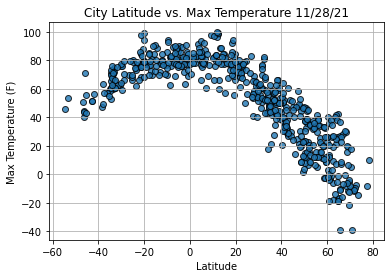

In [13]:
# Import the time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

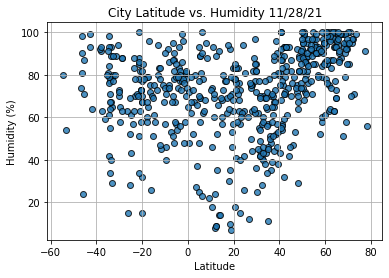

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

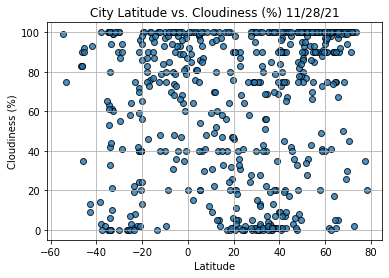

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

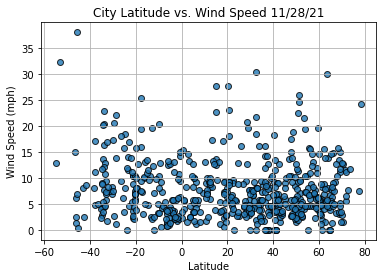

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()